In [61]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, Normalizer

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve, f1_score
from sklearn.metrics import accuracy_score, recall_score, average_precision_score, precision_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


In [2]:
plt.style.use("seaborn-colorblind")

In [3]:
credit = pd.read_csv("NewLoanData.csv")
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   Income          252000 non-null  int64
 1   Age             252000 non-null  int64
 2   Experience      252000 non-null  int64
 3   Risk Flag       252000 non-null  int64
 4   Married/Single  252000 non-null  int64
 5   Home Ownership  252000 non-null  int64
 6   Car Ownership   252000 non-null  int64
dtypes: int64(7)
memory usage: 13.5 MB


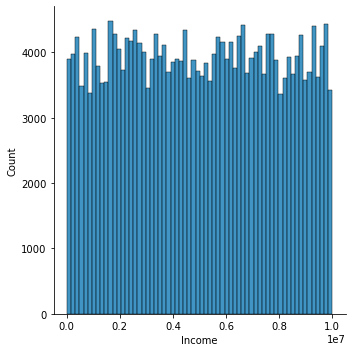

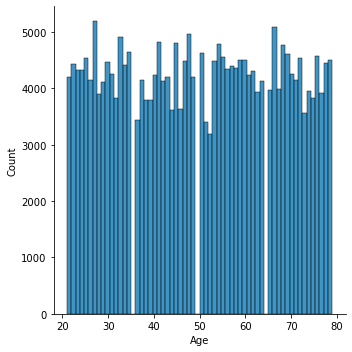

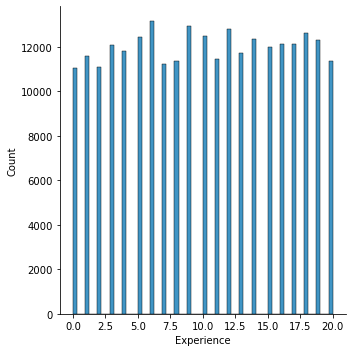

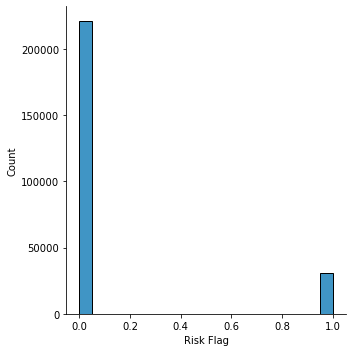

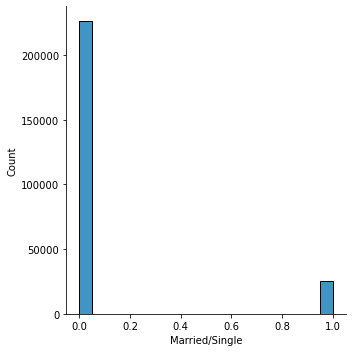

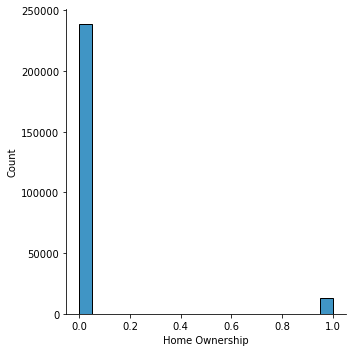

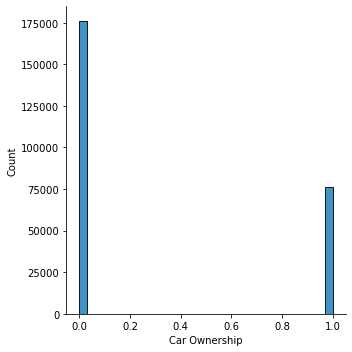

In [4]:
for i in credit.columns:
    sns.displot(credit[i])

In [5]:
credit.corr()

,Income,Age,Experience,Risk Flag,Married/Single,Home Ownership,Car Ownership
Income,1.000000,-0.000652,0.006422,-0.003091,-0.002682,0.000717,0.004068
Age,-0.000652,1.000000,-0.001118,-0.021809,0.005323,0.018865,0.009395
Experience,0.006422,-0.001118,1.000000,-0.034523,0.001752,0.014081,0.007519
Risk Flag,-0.003091,-0.021809,-0.034523,1.000000,-0.021092,-0.023499,-0.024036
Married/Single,-0.002682,0.005323,0.001752,-0.021092,1.000000,-0.023527,-0.001206
Home Ownership,0.000717,0.018865,0.014081,-0.023499,-0.023527,1.000000,0.002317
Car Ownership,0.004068,0.009395,0.007519,-0.024036,-0.001206,0.002317,1.000000


<AxesSubplot:>

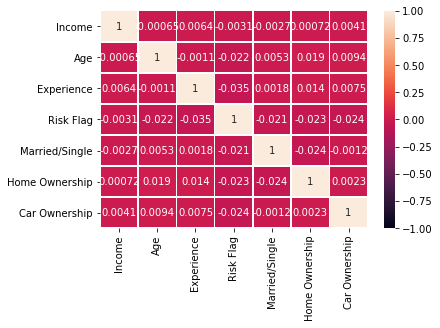

In [6]:
sns.heatmap(credit.corr(), vmin=-1, vmax=1, linewidth=0.5, annot=True)

In [7]:
# Create X and Y variables

X = credit.drop("Risk Flag", axis=1)
y = credit["Risk Flag"]

# Stratification
Split using stratification.

In [8]:
# Split with Stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [9]:
# Default rates?
print(f"Training Default Rate is:   {y_train.mean():.2%}")
print(f"Test Default Rate is:       {y_test.mean():.2%}")

Training Default Rate is:   12.30%
Test Default Rate is:       12.30%


# SMOTE for Imbalance Classification

In [10]:
from imblearn.over_sampling import SMOTE


print ('Number of observations in the target variable before oversampling:', np.bincount(y_train) )

smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)

print ('\nNumber of observations in the target variable after oversampling:', np.bincount(y_train) )

Number of observations in the target variable before oversampling: [176803  24797]

Number of observations in the target variable after oversampling: [176803 176803]


In [11]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Logistic Regression

In [12]:
lr = LogisticRegression()

In [13]:
lr.fit(X_train_std, y_train)

LogisticRegression()

In [14]:
# Prob Estimates
lr.predict_proba(X_test_std)

array([[0.54065441, 0.45934559],
       [0.54403752, 0.45596248],
       [0.45053219, 0.54946781],
       ...,
       [0.43555391, 0.56444609],
       [0.47960067, 0.52039933],
       [0.57058732, 0.42941268]])

In [15]:
# Class Labels (0 or 1)
lr.predict(X_test_std)

array([0, 0, 1, ..., 1, 1, 0])

In [16]:
# Confusion Matrix
confusion_matrix(y_test, lr.predict(X_test_std))

array([[21876, 22325],
       [ 2670,  3529]])

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


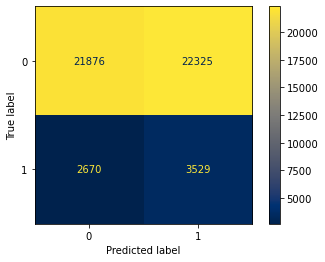

In [17]:
plot_confusion_matrix(lr, X_test_std, y_test, values_format="d", cmap="cividis")

In [18]:
truN, falP, falN, truP = confusion_matrix(y_test, lr.predict(X_test_std)).ravel()
print(f"True Negative: {truN}")
print(f"False Positive: {falP}")
print(f"False Negative: {falN}")
print(f"True Positive: {truP}")

True Negative: 21876
False Positive: 22325
False Negative: 2670
True Positive: 3529


In [19]:
# Accuracy
print(f'Overall Accuracy: {(truN+truP)/len(y_test):.2%}')

Overall Accuracy: 50.41%


In [20]:
# Error Rate
print(f"Error Rate: {1 - accuracy_score(y_test, lr.predict(X_test_std)):.2%}")

Error Rate: 49.59%


In [21]:
print(classification_report(y_test, lr.predict(X_test_std), target_names=["No", "Yes"]))

              precision    recall  f1-score   support

          No       0.89      0.49      0.64     44201
         Yes       0.14      0.57      0.22      6199

    accuracy                           0.50     50400
   macro avg       0.51      0.53      0.43     50400
weighted avg       0.80      0.50      0.59     50400



/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


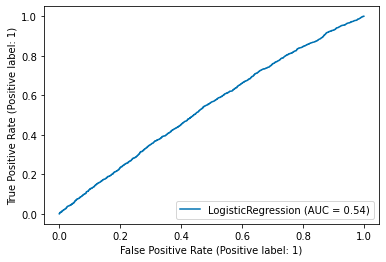

In [22]:
plot_roc_curve(lr, X_test_std, y_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


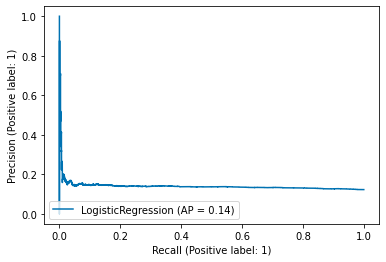

In [23]:
plot_precision_recall_curve(lr, X_test_std, y_test)

# KNN

In [24]:
# k=5
k5 = KNeighborsClassifier(n_neighbors=5)
k5.fit(X_train_std, y_train)

KNeighborsClassifier()

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


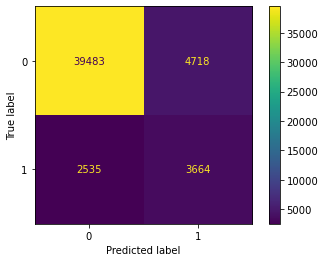

In [25]:
# Plot confusion matrix
confusion_matrix(y_test, k5.predict(X_test_std))
plot_confusion_matrix(k5, X_test_std, y_test)

In [26]:
print(classification_report(y_test, k5.predict(X_test_std), target_names=["No", "Yes"]))

              precision    recall  f1-score   support

          No       0.94      0.89      0.92     44201
         Yes       0.44      0.59      0.50      6199

    accuracy                           0.86     50400
   macro avg       0.69      0.74      0.71     50400
weighted avg       0.88      0.86      0.87     50400



/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


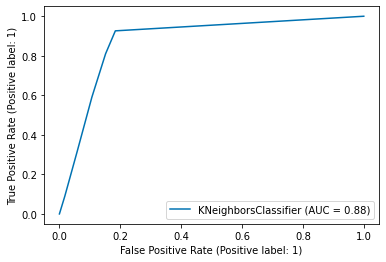

In [27]:
plot_roc_curve(k5, X_test_std, y_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


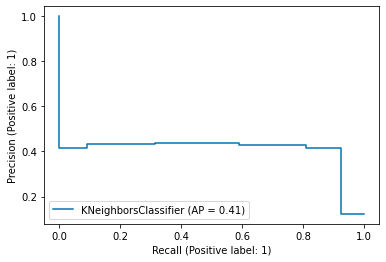

In [28]:
plot_precision_recall_curve(k5, X_test_std, y_test)

# CV for KNN using GridSearchCV

In [29]:
knn_base = KNeighborsClassifier()


In [30]:
scaler2 = StandardScaler().fit(X)
X_s = scaler2.transform(X)

In [31]:
param_grid = {"n_neighbors":np.arange(2,16)}

In [32]:
knnCV = GridSearchCV(knn_base, param_grid, cv=5, scoring="recall")

In [33]:
#knnCV.fit(X_s, y)

In [34]:
#knnCV.best_score_

In [35]:
#knnCV.best_estimator_

# Linear Discriminant Analysis

In [36]:
lda = LinearDiscriminantAnalysis()

In [37]:
lda.fit(X_train_std, y_train)

LinearDiscriminantAnalysis()

In [38]:
confusion_matrix(y_test, lda.predict(X_test_std))

array([[21819, 22382],
       [ 2666,  3533]])

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


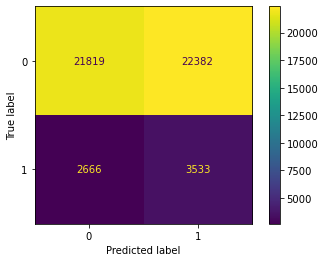

In [39]:
plot_confusion_matrix(lda, X_test_std, y_test)

In [40]:
print(classification_report(y_test, lda.predict(X_test_std), target_names=["No", "Yes"]))

              precision    recall  f1-score   support

          No       0.89      0.49      0.64     44201
         Yes       0.14      0.57      0.22      6199

    accuracy                           0.50     50400
   macro avg       0.51      0.53      0.43     50400
weighted avg       0.80      0.50      0.58     50400



In [41]:
tn2, fp2, fn2, tp2 = confusion_matrix(y_test, lda.predict(X_test_std)).ravel()
print(f"True Negative: {tn2}")
print(f"False Positive: {fp2}")
print(f"False Negative: {fn2}")
print(f"True Positive: {tp2}")
print(f'Overall Accuracy: {(tn2+tp2)/len(y_test):.2%}')

True Negative: 21819
False Positive: 22382
False Negative: 2666
True Positive: 3533
Overall Accuracy: 50.30%


In [42]:
print(f"Recall Score: {recall_score(y_test, lda.predict(X_test_std)):.2%}")
print(f"Precision Score: {precision_score(y_test, lda.predict(X_test_std)):.2%}")

print(f" ROC AUC Score: {roc_auc_score(y_test, lda.predict_proba(X_test_std)[:,1]):.2%}")
print(f" ROC AUC Score: {average_precision_score(y_test, lda.predict_proba(X_test_std)[:,1]):.2%}")

Recall Score: 56.99%
Precision Score: 13.63%
 ROC AUC Score: 54.21%
 ROC AUC Score: 14.10%


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


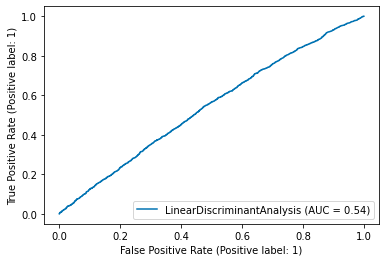

In [43]:
plot_roc_curve(lda, X_test_std, y_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


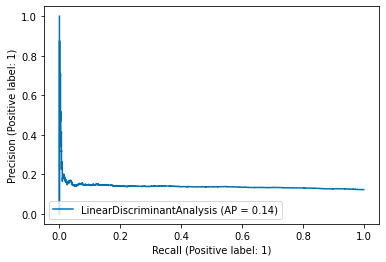

In [44]:
plot_precision_recall_curve(lda, X_test_std, y_test)

# Quadratic Discriminant Analysis

In [45]:
qda = QuadraticDiscriminantAnalysis()

In [46]:
qda.fit(X_train_std, y_train)

QuadraticDiscriminantAnalysis()

In [48]:
confusion_matrix(y_test, qda.predict(X_test_std))

array([[10668, 33533],
       [ 1149,  5050]])

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


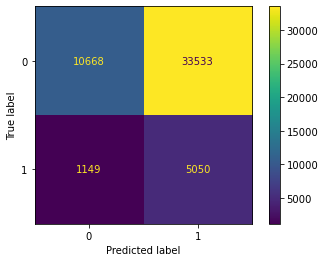

In [55]:
plot_confusion_matrix(qda, X_test_std, y_test)

In [50]:
print(classification_report(y_test, qda.predict(X_test_std), target_names=["No", "Yes"]))

              precision    recall  f1-score   support

          No       0.90      0.24      0.38     44201
         Yes       0.13      0.81      0.23      6199

    accuracy                           0.31     50400
   macro avg       0.52      0.53      0.30     50400
weighted avg       0.81      0.31      0.36     50400



In [51]:
print(f"Recall Score: {recall_score(y_test, qda.predict(X_test_std)):.2%}")
print(f"Precision Score: {precision_score(y_test, qda.predict(X_test_std)):.2%}")

print(f" ROC AUC Score: {roc_auc_score(y_test, qda.predict_proba(X_test_std)[:,1]):.2%}")
print(f" ROC AUC Score: {average_precision_score(y_test, qda.predict_proba(X_test_std)[:,1]):.2%}")

Recall Score: 81.46%
Precision Score: 13.09%
 ROC AUC Score: 54.14%
 ROC AUC Score: 14.03%


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


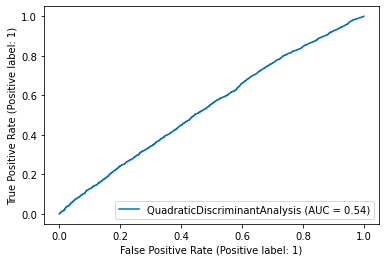

In [53]:
plot_roc_curve(qda, X_test_std, y_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


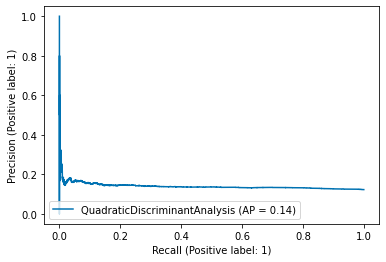

In [54]:
plot_precision_recall_curve(qda, X_test_std, y_test)

# Decision Tree Model

In [59]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_predict = dt.predict(X_test)

In [62]:
print(f'Accuracy Score: {accuracy_score (y_test, dt_predict):.2f}')
print(f'AUC Score: {roc_auc_score (y_test, dt_predict):.2f}')
print(f'F1 Score: {f1_score(y_test,dt_predict):.2f}')

Accuracy Score: 0.86
AUC Score: 0.86
F1 Score: 0.60


In [63]:
print(classification_report(y_test, dt_predict, target_names=["No", "Yes"]))

              precision    recall  f1-score   support

          No       0.98      0.86      0.91     44201
         Yes       0.46      0.86      0.60      6199

    accuracy                           0.86     50400
   macro avg       0.72      0.86      0.76     50400
weighted avg       0.91      0.86      0.88     50400



<AxesSubplot:>

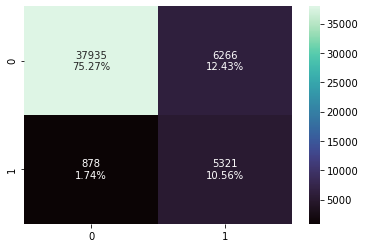

In [65]:
dt_cfm = confusion_matrix(y_test,dt_predict)

group_counts = ['{0:0.0f}'.format(value) for value in
                dt_cfm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     dt_cfm.flatten()/np.sum(dt_cfm)]
labels = [f'{v2}\n{v3}' for  v2, v3 in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(dt_cfm, annot=labels, fmt='', cmap='mako')

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


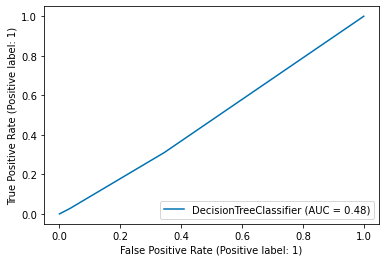

In [66]:
plot_roc_curve(dt, X_test_std, y_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


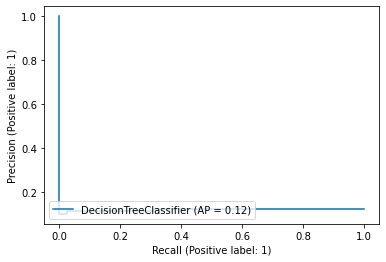

In [67]:
plot_precision_recall_curve(dt, X_test_std, y_test)